# AISC1001 - Statistical Modelling and Inference 01 

#### Name: Hani Desai - 500195336
#### Name: Nishi Agrawal - 500199806
#### Name: Varunsai Achanta - 500197521
#### Name: Hariprasad Rachamalla - 500201661
#### Name: Pratik Domadiya - 500199494

### Linear Regression

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [48]:
Insurance = pd.read_csv('/Users/varunsaiachanta/Downloads/insurance.csv')
# Insurance = pd.read_csv('./insurance.csv')

In [49]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [51]:
Insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [52]:
# replacing column data with boolean values
Insurance['sex'].replace({'female':1,'male':0},inplace=True)
Insurance['smoker'].replace({'yes':1,'no':0},inplace=True)
# one hot encoding
Insurance=pd.get_dummies(Insurance,drop_first=True)

In [53]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age                 1338 non-null int64
sex                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
smoker              1338 non-null int64
charges             1338 non-null float64
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 66.8 KB


In [54]:
# display any null values in the whole dataset
Insurance.isnull().sum().sum()

0

In [55]:
# differenciate dependent and independent variables
features = Insurance.drop(columns=['charges'])
#target varaible(dependent variable)
label = Insurance['charges']

In [56]:
# splitting the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 30)

In [57]:
# initializing linear regression model
model = LinearRegression()

In [58]:
# training the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
score=model.score(X_train, y_train)
print("Linear regression model - score (r-squared mean): %.2f" % score)

Linear regression model - score (r-squared mean): 0.75


In [60]:
# coef in the linear reg equation
print(model.coef_)

[  266.4335918    400.34725269   328.06754804   422.51146946
 23643.32782577  -651.43076146 -1143.12924721 -1092.45230569]


In [61]:
# intercept value
print(model.intercept_)

-12037.20363088225


In [62]:
# representing the above parameters in the dataframe
pd.DataFrame(model.coef_, features.columns, columns = ['Coeff'])

,Coeff
age,266.433592
sex,400.347253
bmi,328.067548
children,422.511469
smoker,23643.327826
region_northwest,-651.430761
region_southeast,-1143.129247
region_southwest,-1092.452306


In [63]:
# predicting on test data
predictions = model.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print( "Linear Regression..........  metrics")
print("model Training score : ",model.score(X_train, y_train))# find the accuracy of training dataset

y_pred_test = model.predict(X_test)

# Predicting MSE the Test set results
mse_linear = ((mean_squared_error(y_test, predictions)))
print(" MSE    : ",mse_linear)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, predictions)))
print(" RMSE  : ",rmse_linear)

# Predicting RMSE the Test set results
mae_linear = (np.sqrt(mean_absolute_error(y_test, predictions)))
print(" MAE   :",mae_linear)

Linear Regression..........  metrics
model Training score :  0.7477342139223713
 MSE    :  37041422.08264673
 RMSE  :  6086.166452098293
 MAE   : 64.74340154911005


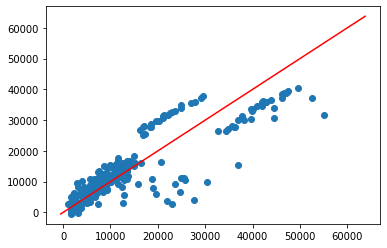

In [21]:
# plotting the outcome in the scatterplot
plt.scatter(y_test, predictions)
plt.plot([min(predictions), max(label)], [min(predictions), max(label)], color='red') # predicted
plt.show()

## Bayesian Regression

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import r2_score

In [24]:
Insurance = pd.read_csv('/Users/varunsaiachanta/Downloads/insurance.csv')
# Insurance = pd.read_csv('./insurance.csv')

In [25]:
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
Insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [28]:
Insurance['sex'].replace({'female':1,'male':0},inplace=True)
Insurance['smoker'].replace({'yes':1,'no':0},inplace=True)
Insurance=pd.get_dummies(Insurance,drop_first=True)

In [29]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
age                 1338 non-null int64
sex                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
smoker              1338 non-null int64
charges             1338 non-null float64
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 66.8 KB


In [30]:
Insurance.isnull().sum().sum()

0

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 30)

In [32]:
# Define the BayesianRidge model with default parameters: 
bay_ridge = BayesianRidge()

In [33]:
bay_ridge.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [34]:
# Use r-squared metrics to measure how close 
# the data is to the predicted regression line.
# Independent variable x^2 = score:
score=bay_ridge.score(X_train, y_train)
print("BayesianRidge regression model - score (r-squared mean): %.2f" % score)


BayesianRidge regression model - score (r-squared mean): 0.75


In [35]:
# Predict the test data and check for accuracy: 
pd = bay_ridge.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import sqrt
# mse = mean_squared_error(y_test, pd)

print( "BAYESIAN Regression..........  metrics")
print("model Training score : ",bay_ridge.score(X_train, y_train))# find the accuracy of training dataset

# y_pred_test = bayes_model.predict(X_test)# test the data on trained model

# Predicting MSE the Test set results
mse_linear = ((mean_squared_error(y_test, pd)))
print(" MSE    : ",mse_linear)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, pd)))
print(" RMSE  : ",rmse_linear)

# Predicting RMSE the Test set results
mae_linear = (np.sqrt(mean_absolute_error(y_test, pd)))
print(" MAE   :",mae_linear)

BAYESIAN Regression..........  metrics
model Training score :  0.7477284086177878
 MSE    :  37064194.57200405
 RMSE  :  6088.0370048155955
 MAE   : 64.78505011209424


In [37]:
# print("Mean squared error level: %.2f" % mse)
print("BayesianRidge regression - mean error level: %.2f" % sqrt(mse))

BayesianRidge regression - mean error level: 6088.04


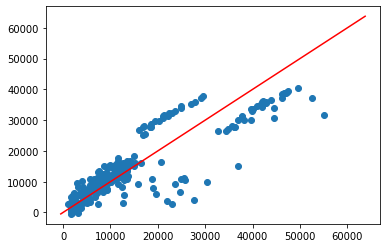

In [42]:
# plt.scatter(y_test, pd)
plt.scatter(y_test, pd)
plt.plot([min(pd), max(label)], [min(pd), max(label)], color='red') # predicted
plt.show()

*******************************************   FINAL ANALYSIS  ***************************************
Linear Regression..........  metrics
model Training score :  0.7477342139223713
 MSE    :  37041422.08264673
 RMSE  :  6086.166452098293
 MAE   : 64.74340154911005
Coefficient of determination (R2_SCORE): 0.75

    
BAYESIAN Regression..........  metrics
model Training score :  0.7477284086177878 ( almost similar to OLS)
 MSE    :  37064194.57200405 ( almost similar OLS)
 RMSE  :  6088.0370048155955 ( almost similar OLS)
 MAE   : 64.785050112094248 ( almost similar to OLS)

Coefficient of determination (R2_SCORE): 0.75 (almost similar to OLS )
    
As we can see that we got the similar graph for OLS and Bayesian regression for diabetes dataset.